In [1]:
from scipy.sparse.linalg import splu, factorized
from scipy.linalg import lu_factor, lu_solve
import numpy as np
np.set_printoptions(precision=4) # Print few decimal places
np.set_printoptions(suppress=True) # Suppress scientific notation
import cvxpy as cp
import pandas as pd
from numpy.linalg import cholesky as llt
import matplotlib.pyplot as plt
import scipy.stats as stats
import time

532

In [234]:
np.random.seed(532)
def gen_pd_matrix(n, mean, std):
    M = np.random.normal(loc=mean, scale=std, size=(n,n))
    A = M @ M.T
    return A

n = 200
A = gen_pd_matrix(n, 0, 1)
eigen_values = np.linalg.eigvals(A)
print("The generated matrix is Positive Definite =", np.all(np.linalg.eigvals(A) > 0))
print("Condition number =", max(eigen_values)/min(eigen_values))

x = cp.Variable(n)
objective = cp.Minimize(cp.quad_form(x, A))
problem = cp.Problem(objective)
problem.solve()
print("Optimal value =",problem.value)

The generated matrix is Positive Definite = True
Condition number = 96289.346304354


ArpackNoConvergence: ARPACK error -1: ARPACK error -1: No convergence (2001 iterations, 0/1 eigenvectors converged)


        CVXPY note: This failure was encountered while trying to certify
        that a matrix is positive semi-definite (see [1] for a definition).
        In rare cases, this method fails for numerical reasons even when the matrix is
        positive semi-definite. If you know that you're in that situation, you can
        replace the matrix A by cvxpy.psd_wrap(A).

        [1] https://en.wikipedia.org/wiki/Definite_matrix
        

In [ ]:
print(A)

[[202.9735  22.1002  19.3101 ...  38.0534  23.8112  -8.31  ]
 [ 22.1002 178.5904  -9.0442 ...   9.0756  17.9349  -9.2116]
 [ 19.3101  -9.0442 203.9098 ...   6.6498  -0.4012  21.3237]
 ...
 [ 38.0534   9.0756   6.6498 ... 222.7602 -14.4251 -19.9831]
 [ 23.8112  17.9349  -0.4012 ... -14.4251 197.1301  -0.8145]
 [ -8.31    -9.2116  21.3237 ... -19.9831  -0.8145 182.7079]]


Algorithm 1 for $f(x) = \frac{1}{2} x^TAx$ where A is positive definite

Note: We use $t=1/L$ as the step-size

Alg. 1 with $q = 0$

In [ ]:
np.random.seed(42)
iterations = 10000
q = 0
theta = 1
eigvals = np.linalg.eigvals(A)
t = 1 / max(eigvals)
x = y = np.random.uniform(-A.shape[1], A.shape[1], A.shape[1])

value_q_0 = np.zeros(iterations)

for i in range(iterations):
    x_next = y - t * A @ y
    theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
    beta = theta*(1-theta) / (theta**2+theta_next)
    y = x_next+beta*(x_next-x)
    value_q_0[i] = 0.5*x_next.T @ A @ x_next
    x = x_next
    theta = theta_next

print(0.5*x.T @ A @ x)

0.004265065565551994


Alg. 1 with $q = 1$

In [235]:
np.random.seed(42)
iterations = 10000
q = 1
theta = 1
eigvals = np.linalg.eigvals(A)
t = 1 / max(eigvals)
x = y = np.random.uniform(-A.shape[1], A.shape[1], A.shape[1])

value_q_1 = np.zeros(iterations)
for i in range(iterations):
    x_next = y - t * A @ y
    theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
    beta = theta*(1-theta) / (theta**2+theta_next)
    y = x_next+beta*(x_next-x)
    value_q_1[i] = 0.5*x_next.T @ A @ x_next
    x = x_next
    theta = theta_next

print(0.5*x.T @ A @ x)

440.6922923399739


Alg. 1 with $q = q^*$

In [236]:
np.random.seed(42)
iterations = 10000
theta = 1
eigvals = np.linalg.eigvals(A)
# Condition nuber
q = (max(eigvals) / min(eigvals)) ** -1
t = 1 / max(eigvals)
x = y = np.random.uniform(-A.shape[1], A.shape[1], A.shape[1])

value_q_star = np.zeros(iterations)
for i in range(iterations):
    x_next = y - t * A @ y
    theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
    beta = theta*(1-theta) / (theta**2+theta_next)
    y = x_next+beta*(x_next-x)
    value_q_star[i] = 0.5*x_next.T @ A @ x_next
    x = x_next
    theta = theta_next

print(0.5*x.T @ A @ x)

5.411116479389926e-22


Alg. 1 with $q = q^* / 10$

In [237]:
np.random.seed(42)
iterations = 10000
theta = 1
eigvals = np.linalg.eigvals(A)
# Condition nuber
q = (max(eigvals) / min(eigvals)) ** -1
q = q / 10
t = 1 / max(eigvals)
x = y = np.random.uniform(-A.shape[1], A.shape[1], A.shape[1])

value_q_star_div_10 = np.zeros(iterations)
for i in range(iterations):
    x_next = y - t * A @ y
    theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
    beta = theta*(1-theta) / (theta**2+theta_next)
    y = x_next+beta*(x_next-x)
    value_q_star_div_10[i] = 0.5*x_next.T @ A @ x_next
    x = x_next
    theta = theta_next

print(0.5*x.T @ A @ x)

9.944761163418738e-08


Alg. 1 with $q = 10q^*$

In [238]:
np.random.seed(42)
iterations = 10000
theta = 1
eigvals = np.linalg.eigvals(A)
# Condition nuber
q = (max(eigvals) / min(eigvals)) ** -1
q = 10 * q
t = 1 / max(eigvals)
x = y = np.random.uniform(-A.shape[1], A.shape[1], A.shape[1])

value_q_star_tim_10 = np.zeros(iterations)
for i in range(iterations):
    x_next = y - t * A @ y
    theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
    beta = theta*(1-theta) / (theta**2+theta_next)
    y = x_next+beta*(x_next-x)
    value_q_star_tim_10[i] = 0.5*x_next.T @ A @ x_next
    x = x_next
    theta = theta_next

print(0.5*x.T @ A @ x)

0.011773295321100292


Custom 1

In [239]:
np.random.seed(42)
iterations = 10000
theta = 1
eigvals = np.linalg.eigvals(A)
# Condition nuber
q = (max(eigvals) / min(eigvals)) ** -1
q = q
t = 2 / (max(eigvals) + min(eigvals))
x = y = np.random.uniform(-A.shape[1], A.shape[1], A.shape[1])

value_custom_1 = np.zeros(iterations)
for i in range(iterations):
    x_next = y - t * A @ x
    theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q) - (theta/(i+1))
    beta = theta*(1-theta) / (theta**2+theta_next)
    y = x_next+beta*(x_next-x)
    value_custom_1[i] = 0.5*x_next.T @ A @ x_next
    x = x_next
    theta = theta_next

print(0.5*x.T @ A @ x)

1.0019926859501792e-16


Custom 2

In [240]:
np.random.seed(42)
iterations = 10000
theta = 1
eigvals = np.linalg.eigvals(A)
# Condition nuber
q = (max(eigvals) / min(eigvals)) ** -1
q = q
t = 2 / (max(eigvals) + min(eigvals))
x = y = np.random.uniform(-A.shape[1], A.shape[1], A.shape[1])

value_custom_2 = np.zeros(iterations)
for i in range(iterations):
    x_next = y - t * A @ x
    theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
    beta = theta*(1-theta) / (theta**2+theta_next)
    y = x_next+beta*(x_next-x)
    value_custom_2[i] = 0.5*x_next.T @ A @ x_next
    x = x_next
    theta = theta_next

print(0.5*x.T @ A @ x)

3.900806434509853e-26


In [277]:
np.random.seed(42)
iterations = 10000
theta = 1
eigvals = np.linalg.eigvals(A)
# Condition nuber
q = (max(eigvals) / min(eigvals)) ** -1
q = q
t = 2 / (max(eigvals) + min(eigvals))
t_star = 1 / max(eigvals)
x = y = np.random.uniform(-A.shape[1], A.shape[1], A.shape[1])

value_custom_3 = np.zeros(iterations)
for i in range(iterations):
    x_next = y - t * A @ x
    # x_next_2 = y - t_star * A @ y
    
    # shreck = (0.5 * np.linalg.norm(x_next_1) + 0.5 * np.linalg.norm(x_next_2)) / np.linalg.norm(0.5*x_next_1+0.5*x_next_2)
    # # shreck = 0.8
    # x_next = shreck*x_next_1 + (1-shreck)*x_next_2
    theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
    beta = theta*(1-theta) / (theta**2+theta_next)
    y = x_next+beta*(x_next-x)
    value_custom_3[i] = 0.5*x_next.T @ A @ x_next
    x = x_next
    theta = theta_next
    
print(0.5*x.T @ A @ x)

3.900806434509853e-26


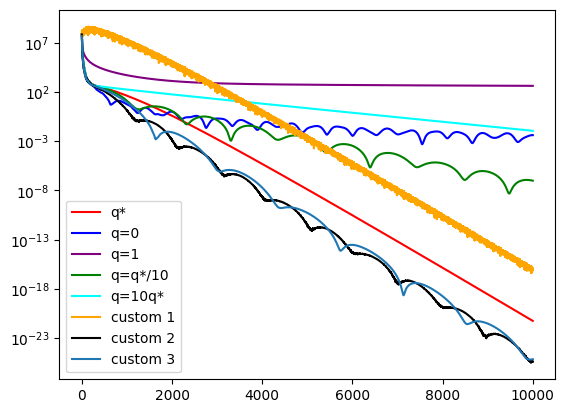

In [ ]:
plt.plot(value_q_star, label='q*', color='red')
plt.plot(value_q_0, label='q=0', color='blue')
plt.plot(value_q_1, label='q=1', color='purple')
plt.plot(value_q_star_div_10, label='q=q*/10', color='green')
plt.plot(value_q_star_tim_10, label='q=10q*', color='cyan')
plt.plot(value_custom_1, label='custom 1', color='orange')
plt.plot(value_custom_2, label='custom 2', color='black')
# plt.plot(value_custom_3, label='custom 3')
plt.yscale('log')
plt.legend()

Algorithm 2

In [534]:
np.random.seed(42)
iterations = 5000
eigvals = np.linalg.eigvals(A)
# Condition nuber
cond = (max(eigvals) / min(eigvals)) ** -1
beta_star = (1 - np.sqrt(cond)) / (1 + np.sqrt(cond))
t = 1 / max(eigvals)
x = y = np.random.uniform(-A.shape[1], A.shape[1], A.shape[1])

value_alg_2 = np.zeros(5000)
for i in range(iterations):
    x_next = y - t * A @ y
    y = x_next + beta * (x_next - x)
    value_alg_2[i] = 0.5*x.T @ A @ x
    x = x_next

print(0.5*x.T @ A @ x)

0.2087855366281494


For Fig. 2

In [535]:
temp = np.random.normal(loc=0, scale=1, size=(2,2))
P = temp @ temp.T

print("The generated matrix is Positive Definite =", np.all(np.linalg.eigvals(P) > 0))

The generated matrix is Positive Definite = True


Alg. 1 with $q = 0$

In [580]:
np.random.seed(42)
iterations = 100
q = 0
theta = 1
eigvals = np.linalg.eigvals(P)
t = 1 / max(eigvals)
x = y = -np.random.uniform(-P.shape[1], P.shape[1], P.shape[1])

fig_2_x_q_0 = np.zeros(100, dtype=object)

for i in range(iterations):
    x_next = y - t * P @ y
    theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
    beta = theta*(1-theta) / (theta**2+theta_next)
    y = x_next+beta*(x_next-x)
    fig_2_x_q_0[i] = x_next
    x = x_next
    theta = theta_next

print(0.5*x.T @ P @ x)

7.315178933695044e-17


Alg. 1 with $q=q^*$

In [582]:
np.random.seed(42)
iterations = 100
theta = 1
eigvals = np.linalg.eigvals(P)
# Condition nuber
q = (max(eigvals) / min(eigvals)) ** -1
t = 1 / max(eigvals)
x = y = -np.random.uniform(-P.shape[1], P.shape[1], P.shape[1])

fig_2_x_q_star = np.zeros(100, dtype=object)

for i in range(iterations):
    x_next = y - t * P @ y
    theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
    beta = theta*(1-theta) / (theta**2+theta_next)
    y = x_next+beta*(x_next-x)
    fig_2_x_q_star[i] = x_next
    x = x_next
    theta = theta_next

print(0.5*x.T @ P @ x)

4.716955362587715e-50


Alg. 3 with $k^*=e\sqrt{8L/\mu}$

In [583]:
np.random.seed(42)
iterations = 100
q = 0
theta = 1
eigvals = np.linalg.eigvals(P)
t = 1 / max(eigvals)
x = y = -np.random.uniform(-P.shape[1], P.shape[1], P.shape[1])
k = int(np.e * np.sqrt(8*(max(eigvals) / min(eigvals))))

fig_2_restarts = np.zeros(101, dtype=object)
count = 0
while count < 100:
    theta = 1
    for i in range(k):
        x_next = y - t * P @ y
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
        beta = theta*(1-theta) / (theta**2+theta_next)
        y = x_next+beta*(x_next-x)
        fig_2_restarts[count] = x_next
        x = x_next
        theta = theta_next
        count += 1
        if count > 100:
            break

print(0.5*x.T @ P @ x)

9.362549813906295e-26


Fig. 2

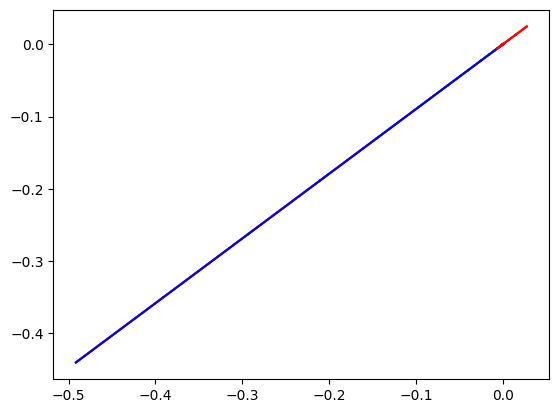

In [592]:
for i in range(1, 100):
    x_test1, y_test1 = fig_2_x_q_star[i-1]
    x_test2, y_test2 = fig_2_x_q_star[i]
    plt.plot([x_test1, x_test2], [y_test1, y_test2], color='green')
    x_test1, y_test1 = fig_2_x_q_0[i-1]
    x_test2, y_test2 = fig_2_x_q_0[i]
    plt.plot([x_test1, x_test2], [y_test1, y_test2], color='red')
    x_test1, y_test1 = fig_2_x_q_star[i-1]
    x_test2, y_test2 = fig_2_x_q_star[i]
    plt.plot([x_test1, x_test2], [y_test1, y_test2], color='blue')

In [771]:
temp = np.random.normal(loc=0, scale=1, size=(500,500))
G = temp @ temp.T

print("The generated matrix is Positive Definite =", np.all(np.linalg.eigvals(G) > 0))
print(min(np.linalg.eigvals(G)))

The generated matrix is Positive Definite = True
0.0019114376465742995


Alg. 3 where $k = e\sqrt{8L/\mu}$

In [772]:
np.random.seed(42)
iterations = 5000
q = 0
theta = 1
eigvals = np.linalg.eigvals(G)
t = 1 / max(eigvals)
x = y = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])
k = int(np.e * np.sqrt(8*(max(eigvals) / min(eigvals))))

value_alg_3 = np.zeros(int(np.ceil(iterations/k))*k)
count = 0
for j in range(int(np.ceil(iterations/k))):
    theta = 1
    for i in range(k):
        x_next = y - t * G @ y
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
        beta = theta*(1-theta) / (theta**2+theta_next)
        y = x_next+beta*(x_next-x)
        value_alg_3[count] = 0.5*x_next.T @ G @ x_next
        x = x_next
        theta = theta_next
        count += 1

print(0.5*x.T @ G @ x)

0.3000497623977427


Alg. 1 with $q = q^*$

In [773]:
np.random.seed(42)
iterations = 5000
theta = 1
eigvals = np.linalg.eigvals(G)
# Condition nuber
q = (max(eigvals) / min(eigvals)) ** -1
t = 1 / max(eigvals)
x = y = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])

value_q_star = np.zeros(iterations)
for i in range(iterations):
    x_next = y - t * G @ y
    theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
    beta = theta*(1-theta) / (theta**2+theta_next)
    y = x_next+beta*(x_next-x)
    value_q_star[i] = 0.5*x_next.T @ G @ x_next
    x = x_next
    theta = theta_next

print(0.5*x.T @ G @ x)

0.7468177596391004


Alg. 3 with $k=400$

In [774]:
np.random.seed(42)
iterations = 5000
q = 0
theta = 1
eigvals = np.linalg.eigvals(G)
t = 1 / max(eigvals)
x = y = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])
k = 400

value_alg_3_k_400 = np.zeros(int(np.ceil(iterations/k))*k)
count = 0
for j in range(int(np.ceil(iterations/k))):
    theta = 1
    y = x
    for i in range(k):
        x_next = y - t * G @ y
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
        beta = theta*(1-theta) / (theta**2+theta_next)
        y = x_next+beta*(x_next-x)
        value_alg_3_k_400[count] = 0.5*x_next.T @ G @ x_next
        x = x_next
        theta = theta_next
        count += 1

print(0.5*x.T @ G @ x)

54.151128936195086


Alg. 3 with $k=700$

In [775]:
np.random.seed(42)
iterations = 5000
q = 0
theta = 1
eigvals = np.linalg.eigvals(G)
t = 1 / max(eigvals)
x = y = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])
k = 700

value_alg_3_k_700 = np.zeros(int(np.ceil(iterations/k))*k)
count = 0
for j in range(int(np.ceil(iterations/k))):
    theta = 1
    y = x
    for i in range(k):
        x_next = y - t * G @ y
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
        beta = theta*(1-theta) / (theta**2+theta_next)
        y = x_next+beta*(x_next-x)
        value_alg_3_k_700[count] = 0.5*x_next.T @ G @ x_next
        x = x_next
        theta = theta_next
        count += 1

print(0.5*x.T @ G @ x)

24.596926048971884


Alg. 3 with $q=\mu/L$

In [776]:
np.random.seed(42)
iterations = 5000
q = (max(eigvals) / min(eigvals)) ** -1
theta = 1
eigvals = np.linalg.eigvals(G)
t = 1 / max(eigvals)
x = y = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])
k = 700

value_fig_3 = np.zeros(int(np.ceil(iterations/k))*k)
count = 0
for j in range(int(np.ceil(iterations/k))):
    theta = 1
    y = x
    for i in range(k):
        x_next = y - t * G @ y
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
        beta = theta*(1-theta) / (theta**2+theta_next)
        y = x_next+beta*(x_next-x)
        value_fig_3[count] = 0.5*x_next.T @ G @ x_next
        x = x_next
        theta = theta_next
        count += 1

print(0.5*x.T @ G @ x)

25.085227409004677


Alg. 3 with restarts when $\nabla f(y^{k-1})^T(x^k-x^{k-1})>0$

In [ ]:
np.random.seed(42)
iterations = 5000
q = 0
theta = 1
eigvals = np.linalg.eigvals(G)
t = 1 / max(eigvals)
x = y = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])
k = 700

value_alg_3_gradient = np.zeros(iterations+1)
count = 0
while count < iterations:
    theta = 1
    y = x
    while True:
        x_next = y - t * G @ y
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
        beta = theta*(1-theta) / (theta**2+theta_next)
        y_next = x_next+beta*(x_next-x)
        value_alg_3_gradient[count] = 0.5*x_next.T @ G @ x_next
        count += 1
        if ((G@y).T @ (x_next - x) > 0):
            break
        x = x_next
        y = y_next
        theta = theta_next
        if count > iterations:
            break
    if count > iterations:
        break

print(0.5*x.T @ G @ x)

2.189716717368944


Alg. 3 with restarts when $f(x^k) > f(x^{k-1})$

In [ ]:
np.random.seed(42)
iterations = 5000
q = 0
theta = 1
eigvals = np.linalg.eigvals(G)
t = 1 / max(eigvals)
x = y = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])
k = 700

value_alg_3_function = np.zeros(iterations+1)
count = 0
while count < iterations:
    theta = 1
    y = x
    while True:
        x_next = y - t * G @ y
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
        beta = theta*(1-theta) / (theta**2+theta_next)
        y_next = x_next+beta*(x_next-x)
        value_alg_3_function[count] = 0.5*x_next.T @ G @ x_next
        count += 1
        if (x_next.T @ G @ x_next > x @ G @ x):
            break
        x = x_next
        y = y_next
        theta = theta_next
        if count > iterations:
            break
    if count > iterations:
        break

print(0.5*x.T @ G @ x)

2.199090694074419


Fig. 3 n =500

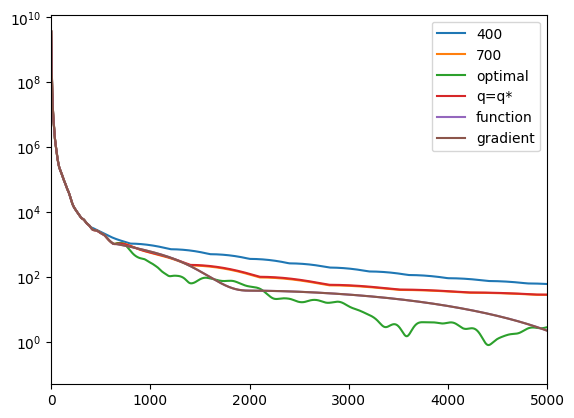

In [779]:
plt.plot(value_alg_3_k_400, label='400')
plt.plot(value_alg_3_k_700, label='700')
plt.plot(value_alg_3, label="optimal")
plt.plot(value_fig_3, label="q=q*")
plt.plot(value_alg_3_function, label='function')
plt.plot(value_alg_3_gradient, label='gradient')
plt.yscale('log')
plt.xlim(0, iterations)
plt.legend()

In [1002]:
np.random.seed(42)
temp = np.random.normal(loc=0, scale=1, size=(200,200))
G = temp @ temp.T

print("The generated matrix is Positive Definite =", np.all(np.linalg.eigvals(G) > 0))
print("Condition number =", max(np.linalg.eigvals(G))/min(np.linalg.eigvals(G)))

The generated matrix is Positive Definite = True
Condition number = 173159.27596469762


Alg. 3 where $k = e\sqrt{8L/\mu}$

In [974]:
np.random.seed(42)
iterations = 5000
q = 0
theta = 1
eigvals = np.linalg.eigvals(G)
t = 1 / max(eigvals)
x = y = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])
k = int(np.e * np.sqrt(8*(max(eigvals) / min(eigvals))))

value_alg_3 = np.zeros(int(np.ceil(iterations/k))*k)
count = 0
for j in range(int(np.ceil(iterations/k))):
    theta = 1
    for i in range(k):
        x_next = y - t * G @ y
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
        beta = theta*(1-theta) / (theta**2+theta_next)
        y = x_next+beta*(x_next-x)
        value_alg_3[count] = 0.5*x_next.T @ G @ x_next
        x = x_next
        theta = theta_next
        count += 1

print(0.5*x.T @ G @ x)

0.0001217996758660785


Alg. 1 with $q = q^*$

In [975]:
np.random.seed(42)
iterations = 5000
theta = 1
eigvals = np.linalg.eigvals(G)
# Condition nuber
q = (max(eigvals) / min(eigvals)) ** -1
t = 1 / max(eigvals)
x = y = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])

value_q_star = np.zeros(iterations)
for i in range(iterations):
    x_next = y - t * G @ y
    theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
    beta = theta*(1-theta) / (theta**2+theta_next)
    y = x_next+beta*(x_next-x)
    value_q_star[i] = 0.5*x_next.T @ G @ x_next
    x = x_next
    theta = theta_next

print(0.5*x.T @ G @ x)

1.6233888597425372e-06


Alg. 3 with $k=400$

In [976]:
np.random.seed(42)
iterations = 5000
q = 0
theta = 1
eigvals = np.linalg.eigvals(G)
t = 1 / max(eigvals)
x = y = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])
k = 400

value_alg_3_k_400 = np.zeros(int(np.ceil(iterations/k))*k)
count = 0
for j in range(int(np.ceil(iterations/k))):
    theta = 1
    y = x
    for i in range(k):
        x_next = y - t * G @ y
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
        beta = theta*(1-theta) / (theta**2+theta_next)
        y = x_next+beta*(x_next-x)
        value_alg_3_k_400[count] = 0.5*x_next.T @ G @ x_next
        x = x_next
        theta = theta_next
        count += 1

print(0.5*x.T @ G @ x)

1.1199140753427945


Alg. 3 with $k=700$

In [977]:
np.random.seed(42)
iterations = 5000
q = 0
theta = 1
eigvals = np.linalg.eigvals(G)
t = 1 / max(eigvals)
x = y = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])
k = 700

value_alg_3_k_700 = np.zeros(int(np.ceil(iterations/k))*k)
count = 0
for j in range(int(np.ceil(iterations/k))):
    theta = 1
    y = x
    for i in range(k):
        x_next = y - t * G @ y
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
        beta = theta*(1-theta) / (theta**2+theta_next)
        y = x_next+beta*(x_next-x)
        value_alg_3_k_700[count] = 0.5*x_next.T @ G @ x_next
        x = x_next
        theta = theta_next
        count += 1

print(0.5*x.T @ G @ x)

0.05629407517250106


Alg. 3 with $q=\mu/L$

In [978]:
np.random.seed(42)
iterations = 5000
q = (max(eigvals) / min(eigvals)) ** -1
theta = 1
eigvals = np.linalg.eigvals(G)
t = 1 / max(eigvals)
x = y = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])
k = 700

value_fig_3 = np.zeros(int(np.ceil(iterations/k))*k)
count = 0
for j in range(int(np.ceil(iterations/k))):
    theta = 1
    y = x
    for i in range(k):
        x_next = y - t * G @ y
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
        beta = theta*(1-theta) / (theta**2+theta_next)
        y = x_next+beta*(x_next-x)
        value_fig_3[count] = 0.5*x_next.T @ G @ x_next
        x = x_next
        theta = theta_next
        count += 1

print(0.5*x.T @ G @ x)

0.11163052794418175


Alg. 3 with restarts when $\nabla f(y^{k-1})^T(x^k-x^{k-1})>0$

In [ ]:
np.random.seed(42)
iterations = 5000
q = 0
theta = 1
eigvals = np.linalg.eigvals(G)
t = 1 / max(eigvals)
x = y = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])
k = 700

value_alg_3_gradient = np.zeros(iterations+1)
count = 0
while count < iterations:
    theta = 1
    y = x
    while True:
        x_next = y - t * G @ y
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
        beta = theta*(1-theta) / (theta**2+theta_next)
        y_next = x_next+beta*(x_next-x)
        value_alg_3_gradient[count] = 0.5*x_next.T @ G @ x_next
        count += 1
        if ((G@y).T @ (x_next - x) > 0):
            break
        x = x_next
        y = y_next
        theta = theta_next
        if count > iterations:
            break
    if count > iterations:
        break

print(0.5*x.T @ G @ x)

5.980896089712395e-08


Alg. 3 with restarts when $f(x^k) > f(x^{k-1})$

In [ ]:
np.random.seed(42)
iterations = 5000
q = 0
theta = 1
eigvals = np.linalg.eigvals(G)
t = 1 / max(eigvals)
x = y = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])
k = 700

value_alg_3_function = np.zeros(iterations+1)
count = 0
while count < iterations:
    theta = 1
    y = x
    while True:
        x_next = y - t * G @ y
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
        beta = theta*(1-theta) / (theta**2+theta_next)
        y_next = x_next+beta*(x_next-x)
        value_alg_3_function[count] = 0.5*x_next.T @ G @ x_next
        count += 1
        if (x_next.T @ G @ x_next > x @ G @ x):
            break
        x = x_next
        y = y_next
        theta = theta_next
        if count > iterations:
            break
    if count > iterations:
        break

print(0.5*x.T @ G @ x)

4.956260876729838e-08


Gradient descent with fixed step-size

In [1017]:
np.random.seed(42)
iterations = 5000
x = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])
eigen = np.linalg.eigvals(G)
t = 2 / (min(eigen) + max(eigen))
value_gradient = np.zeros(iterations+1)
for i in range(iterations):
    x =  x - t * G @ x
    value_gradient[i] = 0.5*x@G@x
print(0.5*x.T @ G @ x)

1064157.695329167


Fig. 3 n = 200

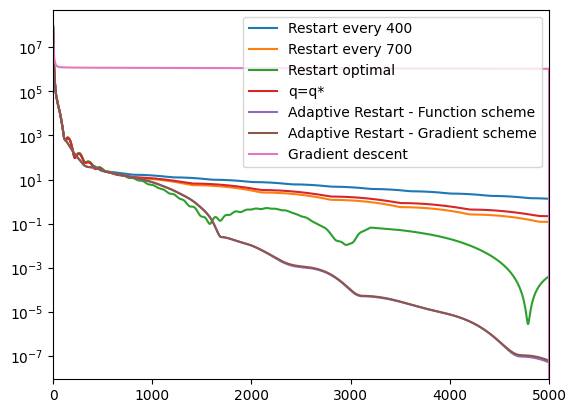

In [1001]:
plt.plot(value_alg_3_k_400, label='Restart every 400')
plt.plot(value_alg_3_k_700, label='Restart every 700')
plt.plot(value_alg_3, label="Restart optimal")
plt.plot(value_fig_3, label="q=q*")
plt.plot(value_alg_3_function, label='Adaptive Restart - Function scheme')
plt.plot(value_alg_3_gradient, label='Adaptive Restart - Gradient scheme')
plt.plot(value_gradient, label='Gradient descent')
plt.yscale('log')
plt.xlim(0, iterations)
plt.legend()

Code for Fig. 4
Not Done

In [1021]:
# Generating problem data
np.random.seed(2)
n = 20
m = 100
a = np.random.randn(m,n)
b = np.random.randn(m)

In [1012]:
rho = 0.05
var = cp.Variable(n)
objective = cp.Minimize(rho * cp.sum([cp.exp((a[i] @ var - b[i])/rho) for i in range(m)]))
problem_0_05 = cp.Problem(objective)
problem_0_05.solve()
print("Objective Value =", problem_0_05.value)

Objective Value = 644191.2311266784


In [1013]:
rho = 0.1
var = cp.Variable(n)
objective = cp.Minimize(rho * cp.sum([cp.exp((a[i] @ var - b[i])/rho) for i in range(m)]))
problem_0_1 = cp.Problem(objective)
problem_0_1.solve()
print("Objective Value =", problem_0_1.value)

Objective Value = 1599.6714769333096


In [1014]:
rho = 0.5
var = cp.Variable(n)
objective = cp.Minimize(rho * cp.sum([cp.exp((a[i] @ var - b[i])/rho) for i in range(m)]))
problem_0_5 = cp.Problem(objective)
problem_0_5.solve()
print("Objective Value =", problem_0_5.value)

Objective Value = 62.849698277811804


In [1015]:
rho = 1
var = cp.Variable(n)
objective = cp.Minimize(rho * cp.sum([cp.exp((a[i] @ var - b[i])/rho) for i in range(m)]))
problem_1 = cp.Problem(objective)
problem_1.solve()
print("Objective Value =", problem_1.value)

Objective Value = 89.23565630711143


Gradient Descent for Fig. 4

In [ ]:
# NOTE
# NOTE
# NOTE
# The step size needs to choosen using the backtracking scheme described in [3, some sing 5.3]
# Also not done
np.random.seed(42)
iterations = 1000
x = np.random.uniform(-G.shape[1], G.shape[1], G.shape[1])
eigen = np.linalg.eigvals(G)
t = 2 / (min(eigen) + max(eigen))
value_gradient = np.zeros(iterations+1)
for i in range(iterations):
    x =  x - t * G @ x
    value_gradient[i] = 0.5*x@G@x
print(0.5*x.T @ G @ x)

1064157.695329167


Alg. 1 for Fig. 4

In [ ]:
np.random.seed(42)
iterations = 5000
q = 0
theta = 1
eigvals = np.linalg.eigvals(A)
t = 1 / max(eigvals)
x = y = np.random.uniform(-A.shape[1], A.shape[1], A.shape[1])

value_q_0 = np.zeros(5000)

for i in range(iterations):
    x_next = y - t * A @ y
    theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*q+4*theta**2+q**2)+q)
    beta = theta*(1-theta) / (theta**2+theta_next)
    y = x_next+beta*(x_next-x)
    value_q_0[i] = 0.5*x_next.T @ A @ x_next
    x = x_next
    theta = theta_next

print(0.5*x.T @ A @ x)

Code for Fig. 5

In [ ]:
# NOTE
# Dimension of the problem is half due to numerical instability experienced
# At higher dimesnions

# Generating instance data
mean = 0
std = 1
n = 1000
m = 250
# m = 100
s = 50
# s = 20

A = np.random.normal(loc=mean, scale=std, size=(m,n))

num_nonzero = s
indices = np.random.choice(n, num_nonzero, replace=False)
y = np.zeros(n)
for i in indices:
    row = i % n
    y[row] = np.random.randn()

w = np.random.normal(loc=0, scale=0.1, size=m)
b = A @ y + w


In [32]:
rho = 1
x_cvxpy = cp.Variable(n)
objective = cp.Minimize(0.5 * cp.sum_squares(A@x_cvxpy - b) + rho * cp.norm(x_cvxpy,1))
problem = cp.Problem(objective)
problem.solve(solver=cp.CLARABEL, tol_gap_abs=1e-10, tol_gap_rel=1e-10,tol_feas=1e-10, tol_ktratio=1e-10)
print(problem.value)

40.53105877179716


Alg. 4

In [33]:
# Soft-Thresholding Operator
def STO(x, alpha):
    result = np.maximum(x - alpha, 0) - np.maximum(-x - alpha, 0)
    return result

In [35]:
iterations = 4000
rho = 1
x = np.zeros(n)
t = 1 / max(np.linalg.eigvals(A.T @ A))

obj_val_ista = []
for i in range(iterations):
    alpha = rho * t
    x_next = x - t * A.T @ (A@x - b)
    # x = STO(x - t * A.T @ (A@x - b), alpha)
    x = np.maximum(x_next - alpha, 0) - np.maximum(-x_next - alpha, 0)
    obj_val_ista.append(0.5 * np.linalg.norm(A@x-b,2)**2 + rho * np.linalg.norm(x,1))
    
print(0.5 * np.linalg.norm(A@x-b,2)**2 + rho * np.linalg.norm(x,1))

42.80986856862064


Alg. 5

In [50]:
iterations = 4000
rho = 1
x = np.zeros(n)
t = 1 / max(np.linalg.eigvals(A.T @ A))
theta = 1

obj_val_fista = []
for i in range(iterations):
    alpha = rho * t
    x_next = y - t * A.T @ (A@y - b)
    # x = STO(x - t * A.T @ (A@x - b), alpha)
    x_next = np.maximum(x_next - alpha, 0) - np.maximum(-x_next - alpha, 0)
    obj_val_fista.append(0.5 * np.linalg.norm(A@x_next-b,2)**2 + rho * np.linalg.norm(x_next,1))
    
    theta_new = (1 + np.sqrt(1+4*theta**2))/2
    beta = (theta - 1) / theta_new
    y = x_next + beta * (x_next - x)
    x = x_next
    theta = theta_new
    
print(0.5 * np.linalg.norm(A@x-b,2)**2 + rho * np.linalg.norm(x,1))

40.53105877181935


FISTA with gradient restarts

In [57]:
iterations = 4000
rho = 1
x = np.zeros(n)
t = 1 / max(np.linalg.eigvals(A.T @ A))
theta = 1
count = 0


obj_val_fista_grad_restarts = []
while count < iterations:
    theta = 1
    y = x
    while True:
        count += 1
        alpha = rho * t
        x_next = y - t * A.T @ (A@y - b)
        # x = STO(x - t * A.T @ (A@x - b), alpha)
        x_next = np.maximum(x_next - alpha, 0) - np.maximum(-x_next - alpha, 0)
        obj_val_fista_grad_restarts.append(0.5 * np.linalg.norm(A@x_next-b,2)**2 + rho * np.linalg.norm(x_next,1))
        
        theta_new = (1 + np.sqrt(1+4*theta**2))/2
        beta = (theta - 1) / theta_new
        # Not sure if the if statement is here or earlier/later
        if ((y -x_next).T @ (x_next - x) > 0):
            break
        y = x_next + beta * (x_next - x)
        x = x_next
        theta = theta_new
        if count > iterations:
            break
    if count > iterations:
        break
    
print(0.5 * np.linalg.norm(A@x-b,2)**2 + rho * np.linalg.norm(x,1))

40.53105877156579


FISTA with objective restarts

In [63]:
iterations = 4000
rho = 1
x = np.zeros(n)
t = 1 / max(np.linalg.eigvals(A.T @ A))
theta = 1
count = 0


obj_val_fista_obj_restarts = []
while count < iterations:
    theta = 1
    y = x
    while True:
        count += 1
        alpha = rho * t
        x_next = y - t * A.T @ (A@y - b)
        # x = STO(x - t * A.T @ (A@x - b), alpha)
        x_next = np.maximum(x_next - alpha, 0) - np.maximum(-x_next - alpha, 0)
        obj_val_fista_obj_restarts.append(0.5 * np.linalg.norm(A@x_next-b,2)**2 + rho * np.linalg.norm(x_next,1))
        
        theta_new = (1 + np.sqrt(1+4*theta**2))/2
        beta = (theta - 1) / theta_new
        # Not sure if the if statement is here or earlier/later
        if count == 1:
            if (obj_val_fista_obj_restarts[count-1] > 0.5 * np.linalg.norm(A@np.zeros(n)-b,2)**2 + rho * np.linalg.norm(np.zeros(n),1)):
                break
        elif (obj_val_fista_obj_restarts[count-1] > obj_val_fista_obj_restarts[count-2]):
            break
        y = x_next + beta * (x_next - x)
        x = x_next
        theta = theta_new
        if count > iterations:
            break
    if count > iterations:
        break
    
print(0.5 * np.linalg.norm(A@x-b,2)**2 + rho * np.linalg.norm(x,1))

40.53105877156578


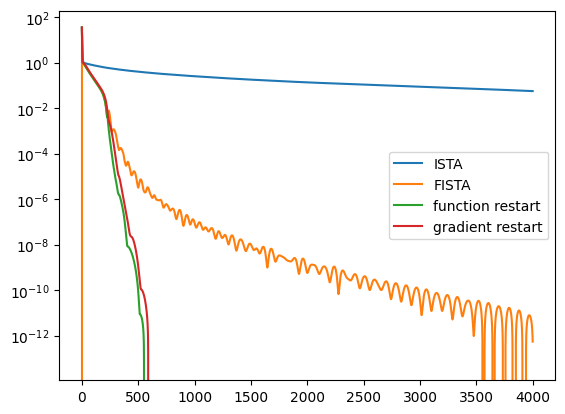

In [65]:
plt.plot((obj_val_ista - problem.value)/problem.value, label="ISTA")
plt.plot((obj_val_fista - problem.value)/problem.value, label="FISTA")
plt.plot((obj_val_fista_obj_restarts - problem.value)/problem.value, label="function restart")
plt.plot((obj_val_fista_grad_restarts - problem.value)/problem.value, label="gradient restart")
plt.yscale('log')
plt.legend()

Code for Fg. 6

Not sure how they generated the matrix Q and vector q, what is "random"

In [182]:
# Data
np.random.seed(145)
def gen_pd_matrix(n, mean, std):
    M = np.random.normal(loc=mean, scale=std, size=(n,n))
    A = M @ M.T
    return A
# The one in the paper is n = 500
n = 500
Q = gen_pd_matrix(n, 0, 1)
q = np.random.randn(n)
b = np.ones(n)
a = -np.ones(n)
eigen_values = np.linalg.eigvals(Q)
print("The generated matrix is Positive Definite =", np.all(np.linalg.eigvals(Q) > 0))
print("Condition number =", max(eigen_values)/min(eigen_values))

The generated matrix is Positive Definite = True
Condition number = 785823.1413355129


In [193]:
x_cvxpy = cp.Variable(Q.shape[0])
objective = cp.Minimize(0.5*cp.quad_form(x_cvxpy, cp.psd_wrap(Q)) + q.T @ x_cvxpy)
# objective = cp.Minimize(0.5*cp.quad_form(x_cvxpy, Q) + q.T @ x_cvxpy)

constraints = [a <= x_cvxpy, x_cvxpy <= b]
problem = cp.Problem(objective, constraints)
problem.solve()
obj_cvxpy = objective.value

Projected Gradient

In [177]:
def projected_gradient(x, a, b):
    z = np.empty(x.shape[0])
    
    for i in range(x.shape[0]):
        if (x[i] <= a[i]):
            z[i] = a[i]
        elif (a[i] <= x[i] and x[i] <= b[i]):
            z[i] = x[i]
        elif (x[i] >= b[i]):
            z[i] = b[i]
        else:
            print("x[i] =",x[i])
            print("Error in projection step")
            
    return z

In [192]:
np.random.seed(42)
t = 1 / max(eigen_values)
iterations = 2000
x = np.random.randn(Q.shape[0])
obj_proj_grad = []

for i in range(iterations):
    x = projected_gradient(x - t * (Q @ x + q), a, b)
    obj_proj_grad.append(0.5*x.T@Q@x + q.T@x)

Accelerated Projected Gradient

The don't state what q should be for the acceleration so I choose $q^*$

In [202]:
np.random.seed(42)
iterations = 2000

t = 1 / max(eigen_values)
theta = 1

# The acceleration q is p in the code
p = (max(eigen_values) / min(eigen_values)) ** -1

x = y = np.random.randn(Q.shape[0])

obj_proj_grad_acc = []

for i in range(iterations):
    x_next = projected_gradient(y - t * (Q @ y + q), a, b)
    
    theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*p+4*theta**2+p**2)+p)
    beta = theta*(1-theta) / (theta**2+theta_next)
    
    y = x_next + beta*(x_next - x)
    
    x = x_next
    theta = theta_next
    
    obj_proj_grad_acc.append(0.5*y.T@Q@y + q.T@y)

Projected Gradient with Function Restarts

In [207]:

np.random.seed(42)

iterations = 2000

t = 1 / max(eigen_values)
theta = 1

x_0 = x = np.random.randn(Q.shape[0])

obj_proj_grad_func_rest = []

count = 0

for i in range(iterations):
    theta = 1
    y = x
    while True:
        count += 1
        
        x_next = projected_gradient(y - t * (Q @ y + q), a, b)
        
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*p+4*theta**2+p**2)+p)
        beta = theta*(1-theta) / (theta**2+theta_next)
        
        y = x_next + beta*(x_next - x)
        
        x = x_next
        theta = theta_next
        
        obj_proj_grad_func_rest.append(0.5*y.T@Q@y + q.T@y)
        
        if count == 1:
            if (obj_proj_grad_func_rest[count-1] > 0.5*x_0.T@Q@x_0 + q.T@x_0):
                break
        elif (obj_proj_grad_func_rest[count-1] > obj_proj_grad_func_rest[count-2]):
            break
        if count > iterations:
            break
        
    if count > iterations:
        break
        
    

Projected Gradient with Gradient Restarts

In [257]:

np.random.seed(42)

iterations = 2000

t = 1 / max(eigen_values)
theta = 1

x_0 = x = np.random.randn(Q.shape[0])

obj_proj_grad_grad_rest = []

count = 0

for i in range(iterations):
    theta = 1
    y = x
    while True:
        count += 1
        
        x_next = projected_gradient(y - t * (Q @ y + q), a, b)
        
        theta_next = 0.5 * (-theta**2+np.sqrt(theta**4-2*(theta**2)*p+4*theta**2+p**2)+p)
        beta = theta*(1-theta) / (theta**2+theta_next)
        
        y_next = x_next + beta*(x_next - x)
        obj_proj_grad_grad_rest.append(0.5*y_next.T@Q@y_next + q.T@y_next)
        
        if ((y - x_next).T @ (x_next - x) > 0):
            break
        
        x = x_next
        theta = theta_next
        y = y_next
        
        if count > iterations:
            break
        
    if count > iterations:
        break
        
    

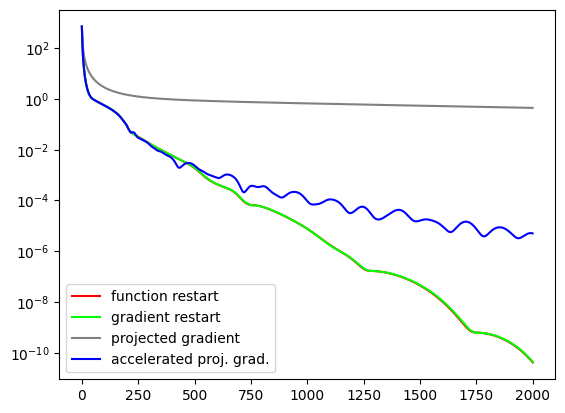

In [256]:
plt.plot(abs((obj_proj_grad_func_rest - obj_cvxpy)/obj_cvxpy), label="function restart", color='red')
plt.plot(abs((obj_proj_grad_grad_rest - obj_cvxpy)/obj_cvxpy), label='gradient restart', color='lime')
plt.plot(abs((obj_proj_grad - obj_cvxpy)/obj_cvxpy), label='projected gradient', color='grey')
plt.plot(abs((obj_proj_grad_acc - obj_cvxpy)/obj_cvxpy), label='accelerated proj. grad.', color='blue')

plt.yscale('log')
plt.legend()
